# Step 1: Data understanding

## Describe data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("dataset/train.csv", index_col="PassengerId")

In [7]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported'],
      dtype='object')

In [8]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Đưa ra thông tin của các hàng
Ta thấy: thông tin bao gồm tên cột, số lượng giá trị not null và kiểu giữ liệu

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


Chuyển Dtype Object sang Dtype Catagory
Không chuyển cột Name và CryoSleep vì không có ý nghĩa dự đoán

In [10]:
features = ["HomePlanet", "CryoSleep", "Destination", "VIP",]


def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")


convert_cat(df, features)

In [11]:
# Miêu tả các giá trị số theo min, max, count, trung bình (mean), độ lệch chuẩn, ...
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
# Miêu tả các giá trị danh mục theo count, unique (giá trị khác nhau), top (giá trị nhiều nhất), freq (số lần xuất hiện)
df.describe(include=['category'])

,HomePlanet,CryoSleep,Destination,VIP
count,8492,8476,8511,8490
unique,3,2,3,2
top,Earth,False,TRAPPIST-1e,False
freq,4602,5439,5915,8291


## Với những danh mục, biểu dồ vẽ như sau

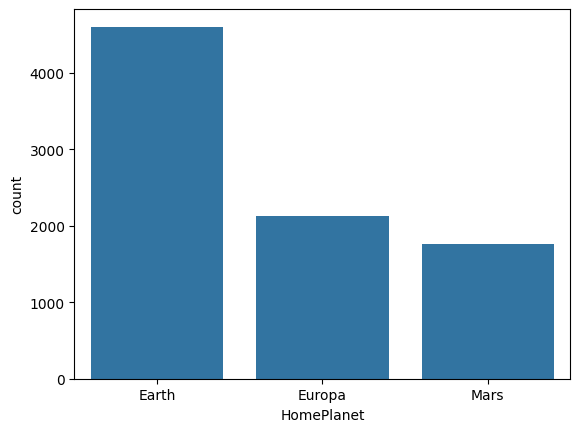

In [13]:
# Vẽ bểu đồ của HomePlanet
sns.countplot(data=df, x='HomePlanet');
plt.show()

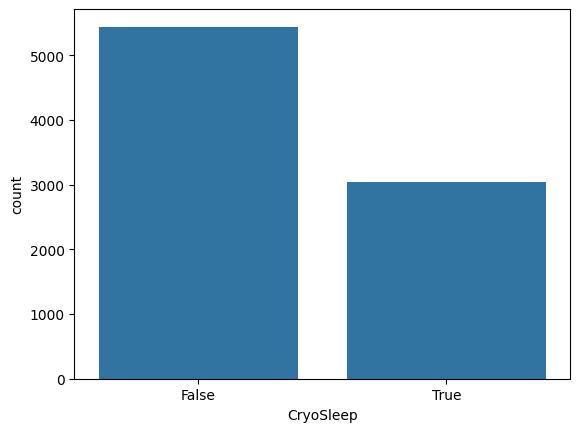

In [14]:
# tương tự, ta có biểu đồ với CryoSleep, Destination, VIP (những cột có kiểu danh mục)
sns.countplot(data=df, x='CryoSleep');

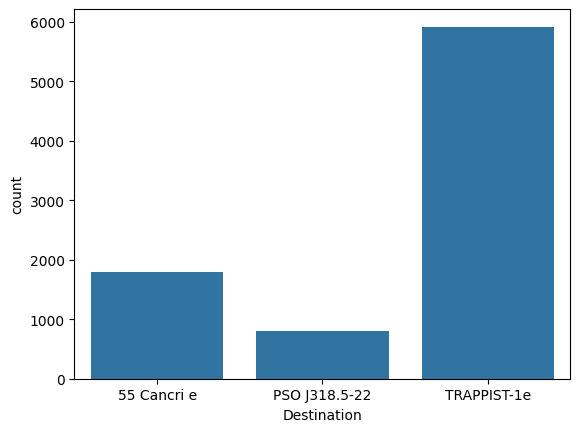

In [15]:
sns.countplot(data=df, x='Destination');

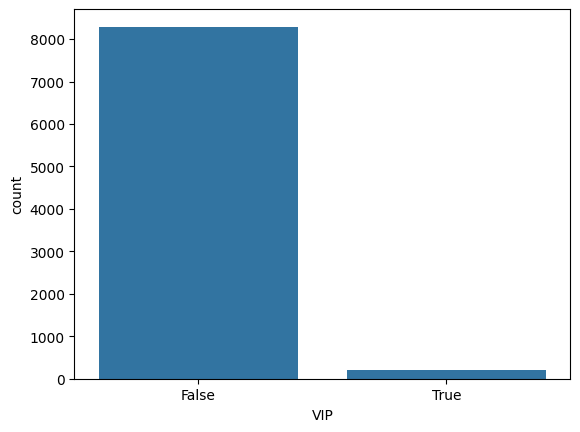

In [16]:
sns.countplot(data=df, x='VIP');

## Với những giá trị số, biểu đồ vẽ như sau

Outlier: > 67

<Axes: xlabel='Age'>

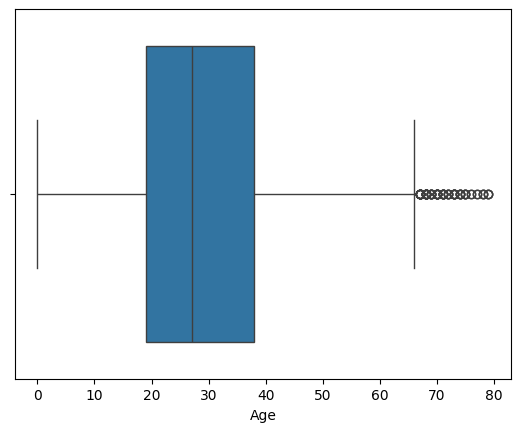

In [24]:
sns.boxplot(x=df['Age'])

Outlier: > 118

<Axes: xlabel='RoomService'>

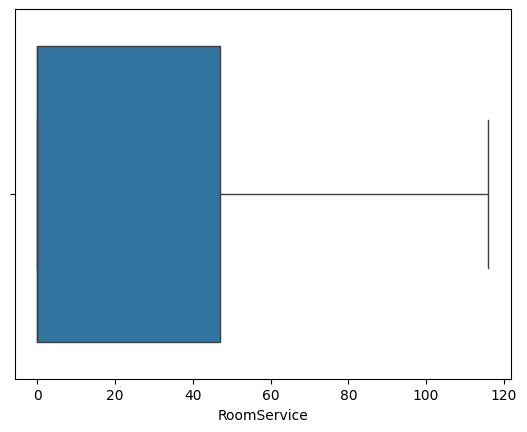

In [26]:
sns.boxplot(x=df['RoomService'], showfliers=False)

Outlier: > 185

<Axes: xlabel='FoodCourt'>

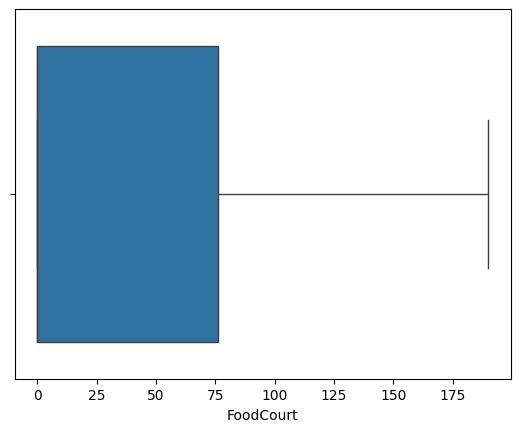

In [28]:
sns.boxplot(x=df['FoodCourt'], showfliers=False)

Outlier: > 70

<Axes: xlabel='ShoppingMall'>

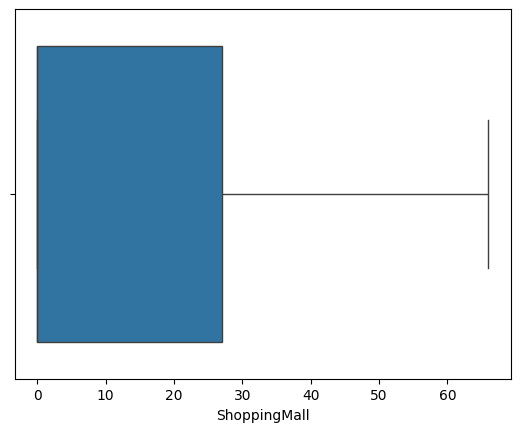

In [30]:
sns.boxplot(x=df['ShoppingMall'], showfliers=False)

Outlier: > 150

<Axes: xlabel='Spa'>

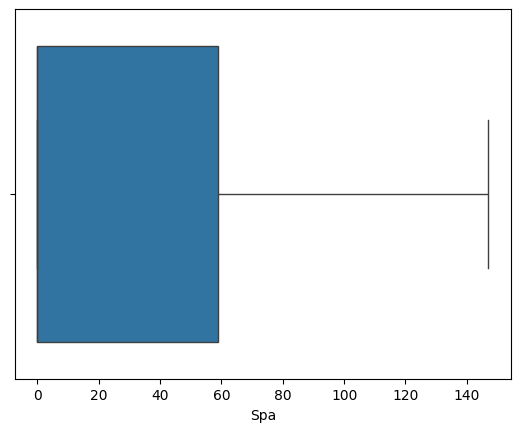

In [32]:
sns.boxplot(x=df['Spa'], showfliers=False)

Outlier: > 118

<Axes: xlabel='VRDeck'>

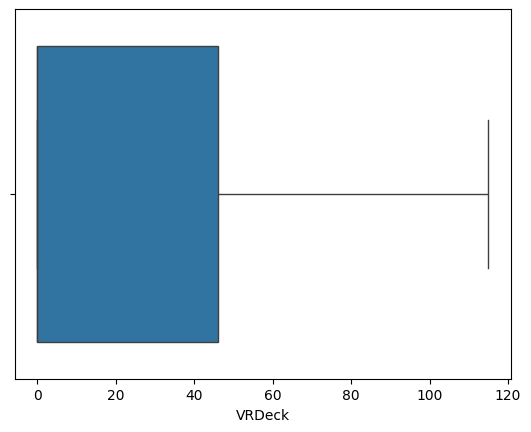

In [34]:
sns.boxplot(x=df['VRDeck'], showfliers=False)